In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv(r'C:\Users\escag\es_repo280720\Homework\Unit3\data\bikeshare.csv', parse_dates=['datetime'])

In [82]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,2011-01-01 00:00:00,Spring,0,0,Clear Skies,9.84,14.395,81,0.0,16
1,2011-01-01 01:00:00,Spring,0,0,Clear Skies,9.02,13.635,80,0.0,40
2,2011-01-01 02:00:00,Spring,0,0,Clear Skies,9.02,13.635,80,0.0,32
3,2011-01-01 03:00:00,Spring,0,0,Clear Skies,9.84,14.395,75,0.0,13
4,2011-01-01 04:00:00,Spring,0,0,Clear Skies,9.84,14.395,75,0.0,1


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  object        
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  object        
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(2)
memory usage: 850.6+ KB


In [84]:
#Split datetime into its components
from datetime import date, time, datetime

df['Date']=df['datetime'].dt.date
df['Year']=df['datetime'].dt.year
df['Month']=df['datetime'].dt.month
df['Day']=df['datetime'].dt.day
df['DOW']=df['datetime'].dt.dayofweek
df['Hour']=df['datetime'].dt.hour

In [85]:
#Create a column tracking passing of time
df['time']= (df['datetime']- df['datetime'].min()).dt.days

In [86]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,Date,Year,Month,Day,DOW,Hour,time
0,2011-01-01 00:00:00,Spring,0,0,Clear Skies,9.84,14.395,81,0.0,16,2011-01-01,2011,1,1,5,0,0
1,2011-01-01 01:00:00,Spring,0,0,Clear Skies,9.02,13.635,80,0.0,40,2011-01-01,2011,1,1,5,1,0
2,2011-01-01 02:00:00,Spring,0,0,Clear Skies,9.02,13.635,80,0.0,32,2011-01-01,2011,1,1,5,2,0
3,2011-01-01 03:00:00,Spring,0,0,Clear Skies,9.84,14.395,75,0.0,13,2011-01-01,2011,1,1,5,3,0
4,2011-01-01 04:00:00,Spring,0,0,Clear Skies,9.84,14.395,75,0.0,1,2011-01-01,2011,1,1,5,4,0


## Exploratory Data Analysis

In [87]:
df.groupby(['Year', 'Month'])[['count']].mean()

count
Year Month            
2011 1       54.645012
     2       73.641256
     3       86.849776
     4      111.026374
     5      174.809211
     6      196.877193
     7      203.614035
     8      182.666667
     9      174.622517
     10     174.773626
     11     155.458333
     12     134.173246
2012 1      124.353201
     2      145.646154
     3      208.276923
     4      257.455947
     5      264.109649
     6      287.186404
     7      267.037281
     8      285.570175
     9      292.598684
     10     280.508772
     11     231.980220
     12     217.054825

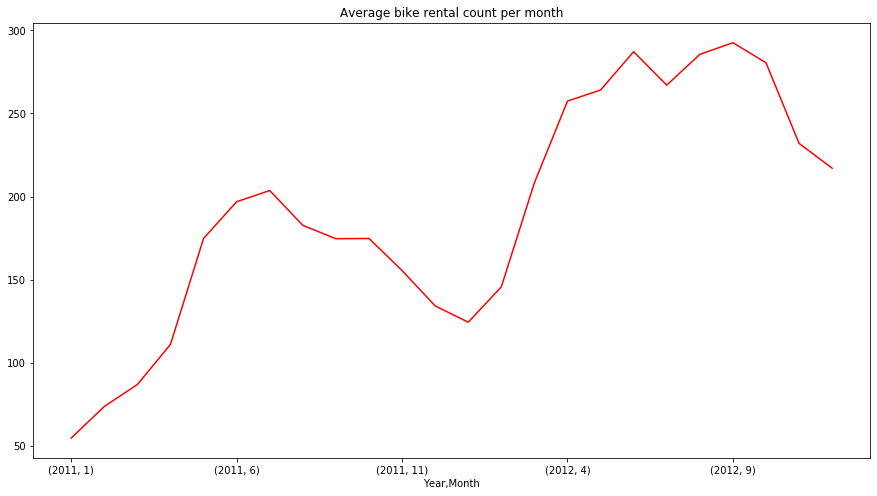

In [88]:
df.groupby(['Year', 'Month'])['count'].mean().plot( color='red', figsize=(15,8), title= 'Average bike rental count per month')

### Rental counts bar charts: Temperature, Humidity, Windspeed and Season

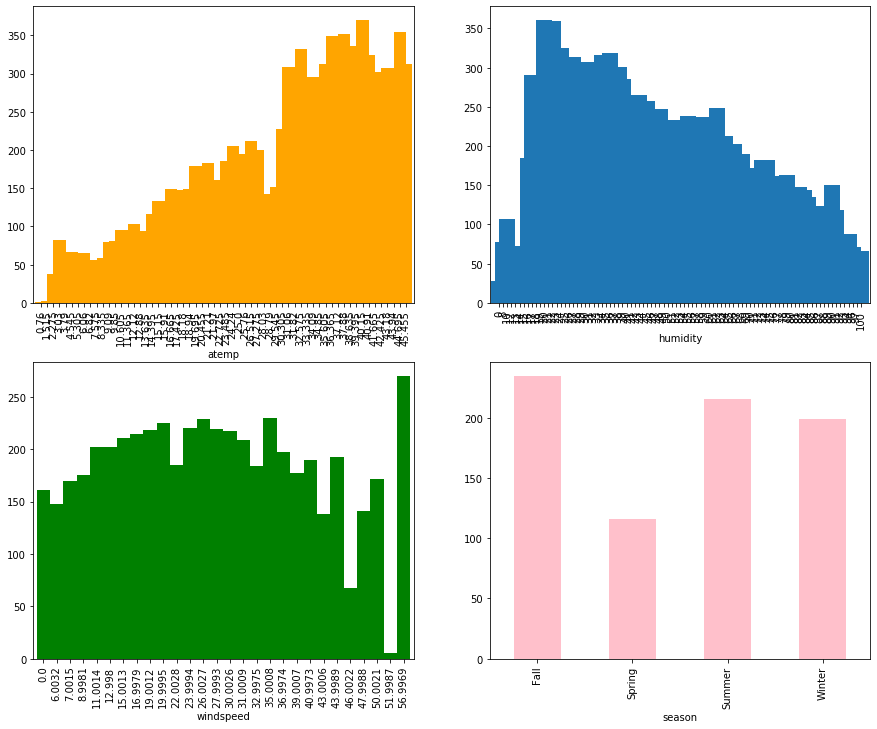

In [89]:
fig,axes = plt.subplots(figsize=(15, 12), nrows=2, ncols=2)

plt.sca(axes[0][0])
atemp_count= df.groupby(['atemp'])['count'].mean()
atemp_count.plot(kind = 'bar', width=2, color='orange')

plt.sca(axes[0][1])
humidity_count= df.groupby(['humidity'])['count'].mean()
humidity_count.plot(kind = 'bar', width=4)

plt.sca(axes[1][0])
windspeed_count= df.groupby(['windspeed'])['count'].mean()
windspeed_count.plot(kind = 'bar', width=1, color='green')

plt.sca(axes[1][1])
season_count= df.groupby(['season'])['count'].mean()
season_count.plot(kind = 'bar', width=0.5, color='pink')

### Rental count and time-series

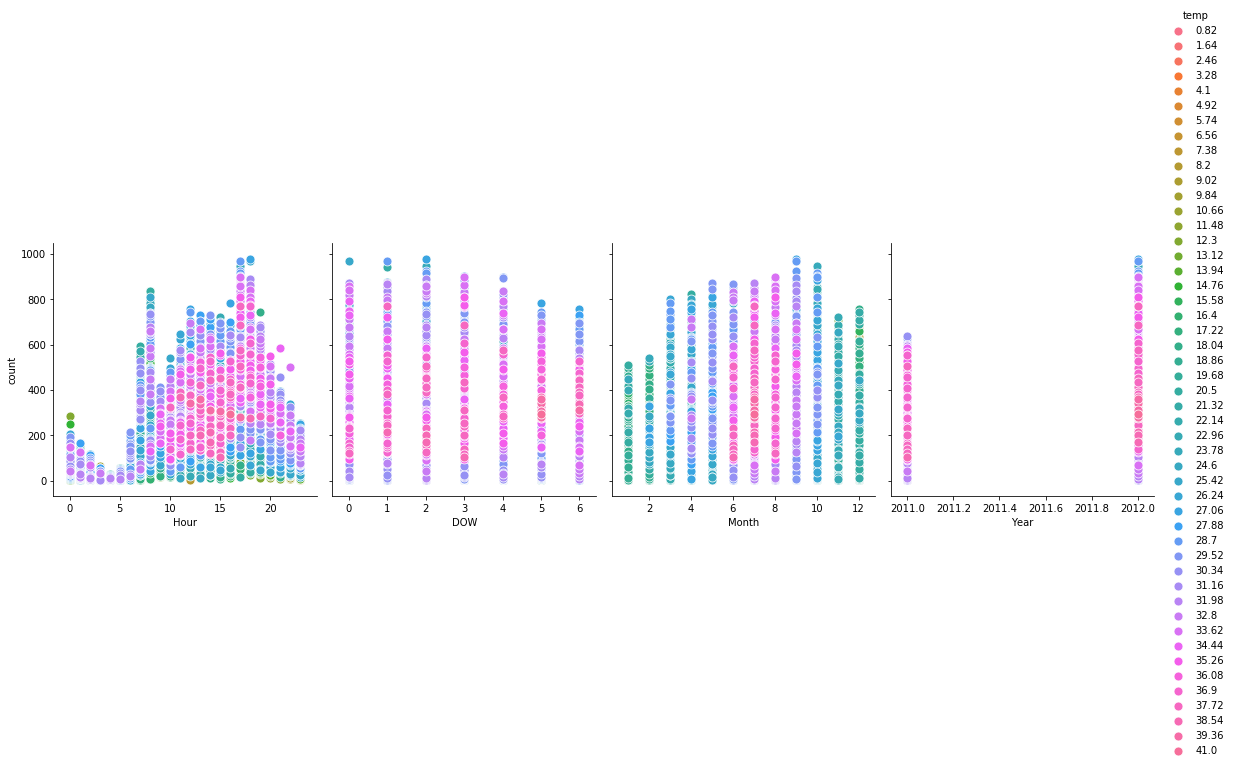

In [90]:
x_vars=[ 'Hour','DOW', 'Month','Year']
y_vars= ['count']
grid=sns.PairGrid(df, y_vars=y_vars, x_vars=x_vars, hue='temp', height=4 )
grid.map(sns.scatterplot, s=80  )
grid.add_legend()

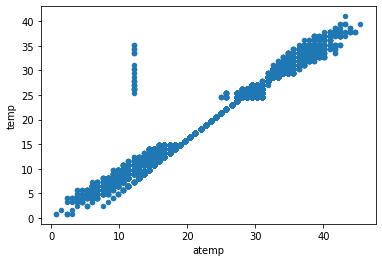

In [91]:
#Relationship between temperature and temperature it feels like outside (atemp)
#There are some anomalous values. Remove 'temp' from dataset
df.plot(x='atemp', y='temp', kind='scatter')

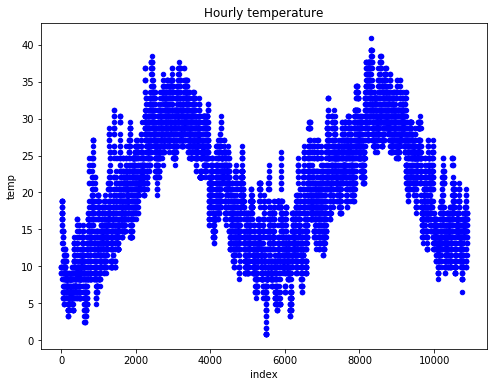

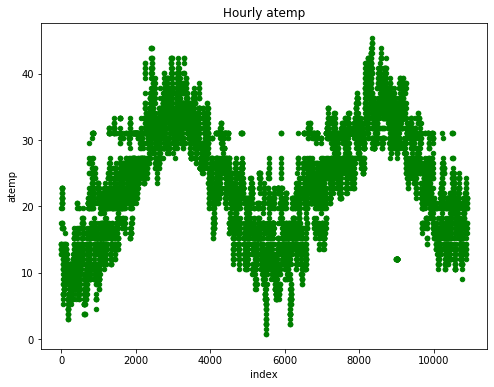

In [92]:
df=df.reset_index()
df.plot('index','temp', kind='scatter', color='blue', title="Hourly temperature", figsize=(8,6))
df.plot('index', 'atemp', kind='scatter', color='green', title="Hourly atemp", figsize=(8,6))
df.drop('index', inplace=True, axis=1)

In [93]:
df.drop('temp', axis=1, inplace=True)

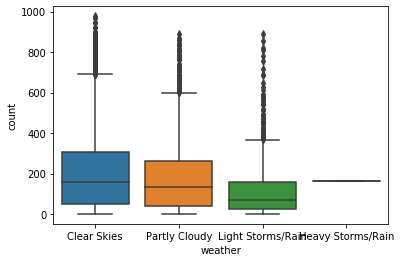

In [94]:
#fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(10,12))
sns.boxplot(data=df, x='weather', y='count')
##Checking for outliers

### Average rentals/hour in 2011 and 2012

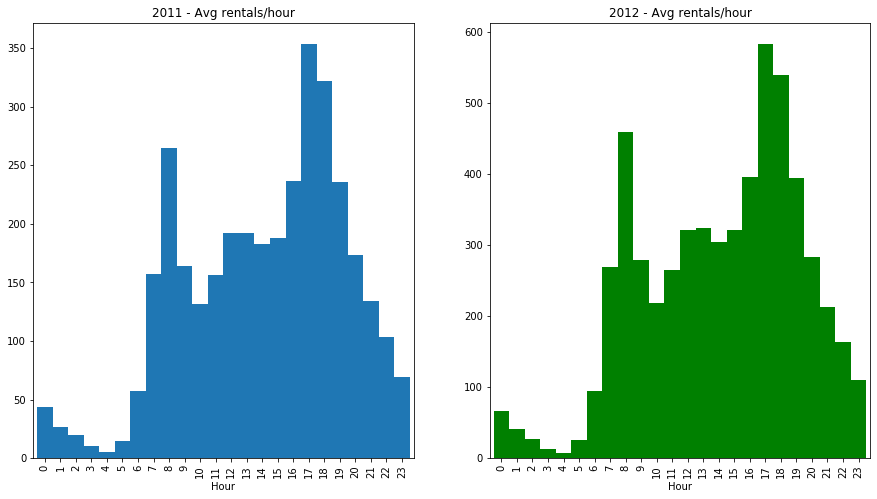

In [95]:
fig,axes = plt.subplots(figsize=(15, 8), nrows=1, ncols=2, )

plt.sca(axes[0])
count2011= df.loc[df.Year==2011, :].groupby(['Hour'])['count'].mean()
count2011.plot(kind = 'bar', width=1, title='2011 - Avg rentals/hour')

plt.sca(axes[1])
count2012= df.loc[df.Year==2012, :].groupby(['Hour'])['count'].mean()
count2012.plot(kind = 'bar', width=1,color='green', title='2012 - Avg rentals/hour')


### Average Rentals per weather conditions and Season

Text(0.5, 0, 'Term')

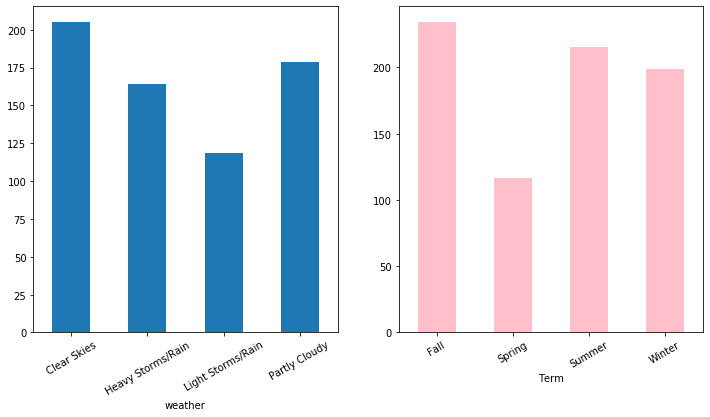

In [96]:
fig,axes = plt.subplots(figsize=(12, 6), nrows=1, ncols=2)
plt.sca(axes[0])
df.groupby(['weather'])['count'].mean().plot( kind='bar', width=0.5, rot=30)
plt.sca(axes[1])
df.groupby(['season'])['count'].mean().plot( kind='bar', width=0.5, color='pink',rot=30)
plt.xlabel('Term')

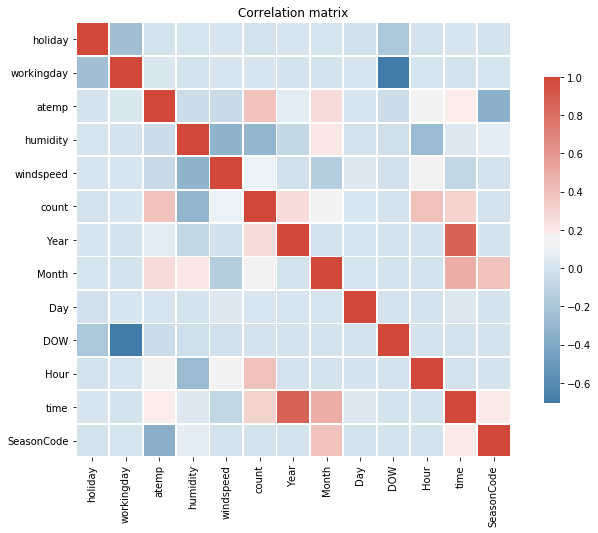

In [97]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df['SeasonCode'] = LE.fit_transform(df['season'])

f, ax = plt.subplots(figsize=(12, 8))
corr_map = sns.diverging_palette(h_neg=240, h_pos=15, as_cmap=True)
sns.heatmap(df.corr(), cmap=corr_map,linewidths=0.8, square=True, cbar_kws={"shrink": .75})
plt.title('Correlation matrix')
    
df.drop('SeasonCode', axis=1, inplace=True)

In [98]:
#Check for null values
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
atemp         0
humidity      0
windspeed     0
count         0
Date          0
Year          0
Month         0
Day           0
DOW           0
Hour          0
time          0
dtype: int64

In [99]:
df.Day.max() #only Days 1 to 19 are collected each month

19

## Modelling the Data - GBR

In [100]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'atemp',
       'humidity', 'windspeed', 'count', 'Date', 'Year', 'Month', 'Day', 'DOW',
       'Hour', 'time'],
      dtype='object')

In [101]:
from sklearn.ensemble import GradientBoostingRegressor
import category_encoders as ce
from sklearn.pipeline import make_pipeline

gbm=GradientBoostingRegressor()
ore = ce.OrdinalEncoder()
pipe=make_pipeline(ore,gbm)

In [102]:
from sklearn.model_selection import train_test_split
X = df.drop('count', axis=1)
X.drop(['datetime', 'Date'], axis=1, inplace=True) #Date, once encoded, is similar to 'Time'
y = df['count']
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.20, random_state=65, shuffle=False)
X_train, X_val, y_train, y_val=  train_test_split(X_train, y_train, test_size=0.20, random_state=65, shuffle=False)

In [103]:
pipe.steps[1][1].set_params(max_depth=3, n_estimators=100,learning_rate=0.1 ) # starting parameters

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [104]:
pipe.fit(X_train, y_train)
pipe.score(X_val, y_val)

0.8113387922838142

In [105]:
X_train=pd.concat([X_train, X_val], axis=0)
y_train=pd.concat([y_train, y_val], axis=0)

In [106]:
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.7820851169526697

In [107]:
pipe.steps[1][1].feature_importances_

array([0.        , 0.00077259, 0.06980828, 0.01414234, 0.1094759 ,
       0.00970019, 0.00088939, 0.        , 0.00084187, 0.00074432,
       0.01346829, 0.61844851, 0.16170831])

In [108]:
#look at feature importances
feats= pd.DataFrame({ 'Colums' : X.columns,
                     'Importance': pipe.steps[1][1].feature_importances_}).sort_values(by='Importance', ascending = False)

In [109]:
feats 

,Colums,Importance
11,Hour,0.618449
12,time,0.161708
4,atemp,0.109476
2,workingday,0.069808
3,weather,0.014142
10,DOW,0.013468
5,humidity,0.009700
6,windspeed,0.000889
8,Month,0.000842
1,holiday,0.000773


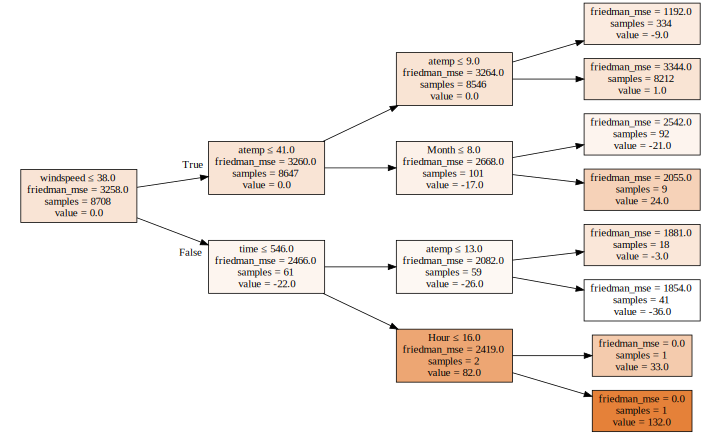

In [110]:
#Graphically checking a few trees
from prep import draw_tree
draw_tree(pipe.steps[1][1].estimators_[-1,-1],X_train)

## Feature Engineering

### Try to improve score by adding features to raw data 

In [111]:
#Add a column representing light/dark - different time intervals for each season/term
conditions = [
    (df['season'] =='Spring') & (df.Hour >8) & (df.Hour <17),
    (df['season'] == 'Summer') & (df.Hour >7) & (df.Hour <19),
    (df['season'] =='Fall') & (df.Hour >6) & (df.Hour <21),
    (df['season'] == 'Winter') & (df.Hour >7) & (df.Hour <18)]
results = [1,1,1,1]
df['Daylight'] = np.select(conditions, results, 0)

In [112]:
X = df.drop(['count', 'datetime', 'Date'], axis=1)
y = df['count']
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.20, random_state=65, shuffle=False)
#X_train, X_val, y_train, y_val=  train_test_split(X_train, y_train, test_size=0.20, random_state=65, shuffle=False)

In [113]:
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test) 

0.790372011617638

In [114]:
#Try if temperature and humidity combined improves the score
df['temp_humidity']=df.atemp*df.humidity

In [115]:
X = df.drop(['count',  'datetime', 'Date'], axis=1)
y = df['count']
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.20, random_state=65, shuffle=False)
#X_train, X_val, y_train, y_val=  train_test_split(X_train, y_train, test_size=0.20, random_state=65, shuffle=False)

In [116]:
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test) 

0.7855485189335235

In [117]:
# score didnt improve. Remove temp_humidity
df.drop('temp_humidity', axis=1, inplace=True)

In [118]:
#Try weather and humidity
di={'Clear Skies':1, 'Partly Cloudy': 2, 'Light Storms/Rain':3,
       'Heavy Storms/Rain':4}
df['weather_humidity']=df['weather'].map(di)*df['humidity']

In [119]:
X = df.drop(['count', 'datetime', 'Date'], axis=1)
y = df['count']
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.20, random_state=65, shuffle=False)
#X_train, X_val, y_train, y_val=  train_test_split(X_train, y_train, test_size=0.20, random_state=65, shuffle=False)
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test) 

0.7879063612048282

In [120]:
# score didnt improve. Remove temp_humidity
df.drop('weather_humidity', axis=1, inplace=True)

In [121]:
#temperature and windspeed combined
df['weatherattr']=df.atemp*(1/(df.windspeed+0.1))

In [123]:
X = df.drop(['count', 'datetime', 'Date'], axis=1)
y = df['count']
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.20, random_state=65, shuffle=False)
#X_train, X_val, y_train, y_val=  train_test_split(X_train, y_train, test_size=0.20, random_state=65, shuffle=False)
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test) 

0.7724494868292824

In [124]:
# score didnt improve. Remove temp_humidity
df.drop('weatherattr', axis=1, inplace=True)

In [125]:
X = df.drop(['count', 'datetime', 'Date'], axis=1)
y = df['count']
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.20, random_state=65, shuffle=False)
X_train, X_val, y_train, y_val=  train_test_split(X_train, y_train, test_size=0.20, random_state=65, shuffle=False)
pipe.fit(X_train, y_train)
pipe.score(X_val, y_val) 

0.8026610695187626

In [126]:
X_train=pd.concat([X_train, X_val], axis=0)
y_train=pd.concat([y_train, y_val], axis=0)

In [127]:
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.7903720116176381

### Time Shift

In [128]:
df=df.reset_index()
df=df.set_index('datetime')

In [129]:
#Shift one Day
df_1D=df.shift(1, freq='D')
df_1D.rename(columns={'count': 'count1D'},  inplace=True)
#Shift One Week
df_1W=df.shift(7, freq='D')
df_1W.rename(columns={'count': 'count1W'},  inplace=True)

In [130]:
df=df.merge(df_1D['count1D'], on='datetime',how='left' )
df=df.merge(df_1W['count1W'], on='datetime',how='left' )

In [131]:
df['count1Dpct']=(1-df['count1D']/df['count'])
df['count1Wpct']=(1-df['count1W']/df['count'])

In [132]:
df.isnull().sum()>0

index         False
season        False
holiday       False
workingday    False
weather       False
atemp         False
humidity      False
windspeed     False
count         False
Date          False
Year          False
Month         False
Day           False
DOW           False
Hour          False
time          False
Daylight      False
count1D        True
count1W        True
count1Dpct     True
count1Wpct     True
dtype: bool

In [133]:
#Replace missing values
missing_cols_query = df.isnull().sum() > 0
missing_cols_num = df.loc[:, missing_cols_query].select_dtypes(include=np.number).columns.tolist()

df[missing_cols_num] = df[missing_cols_num].fillna(0)


In [134]:
df=df.reset_index()

In [135]:
df.head()

,datetime,index,season,holiday,workingday,weather,atemp,humidity,windspeed,count,...,Month,Day,DOW,Hour,time,Daylight,count1D,count1W,count1Dpct,count1Wpct
0,2011-01-01 00:00:00,0,Spring,0,0,Clear Skies,14.395,81,0.0,16,...,1,1,5,0,0,0,0.0,0.0,0.0,0.0
1,2011-01-01 01:00:00,1,Spring,0,0,Clear Skies,13.635,80,0.0,40,...,1,1,5,1,0,0,0.0,0.0,0.0,0.0
2,2011-01-01 02:00:00,2,Spring,0,0,Clear Skies,13.635,80,0.0,32,...,1,1,5,2,0,0,0.0,0.0,0.0,0.0
3,2011-01-01 03:00:00,3,Spring,0,0,Clear Skies,14.395,75,0.0,13,...,1,1,5,3,0,0,0.0,0.0,0.0,0.0
4,2011-01-01 04:00:00,4,Spring,0,0,Clear Skies,14.395,75,0.0,1,...,1,1,5,4,0,0,0.0,0.0,0.0,0.0


In [136]:
X = df.drop(['count', 'datetime', 'Date', 'index'], axis=1)
y = df['count']
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.20, random_state=65, shuffle=False)
X_train, X_val, y_train, y_val=  train_test_split(X_train, y_train, test_size=0.20, random_state=65, shuffle=False)
pipe.fit(X_train, y_train)
pipe.score(X_val, y_val) 

0.9490444223819251

In [137]:
X_train=pd.concat([X_train, X_val], axis=0)
y_train=pd.concat([y_train, y_val], axis=0)

In [138]:
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test) 

0.876448665658232

### Great improvement with the time shift

In [139]:
feats= pd.DataFrame({ 'Colums' : X.columns,
                     'Importance': pipe.steps[1][1].feature_importances_}).sort_values(by='Importance', ascending = False)

In [140]:
feats

,Colums,Importance
14,count1D,0.605620
16,count1Dpct,0.212471
11,Hour,0.081689
15,count1W,0.051133
9,Day,0.014378
12,time,0.010079
13,Daylight,0.008780
4,atemp,0.007740
17,count1Wpct,0.006882
5,humidity,0.000469


In [141]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_log_error,mean_squared_error, make_scorer
tscv=TimeSeriesSplit(n_splits=5)

In [142]:
X = df.drop(['count','datetime', 'Date', 'index'], axis=1)
y = df['count']
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.20, random_state=65, shuffle=False)
#X_train, X_val, y_train, y_val=  train_test_split(X_train, y_train, test_size=0.20, random_state=65, shuffle=False)

### Score the model using RMSLE

In [143]:
#Define a function to calculate the Root Mean Squared log Error 
def rmsle(y, y_pred):
    assert(y.shape == y_pred.shape)
    y_pred=y_pred.clip(min=0)
    return np.sqrt(mean_squared_log_error( y, y_pred))

rmsle_scorer = make_scorer(rmsle, greater_is_better=False)
tscv = TimeSeriesSplit(n_splits=5)

### Model parameters exploration to find best combination on the validation set

In [144]:
max_depth = [3,4,5]
learning_rate=[0.01, .1]
num_trees =[100, 500, 1000]
cv_scores=[]
for depth in max_depth:
    for rate in learning_rate:
        for tree in num_trees:
            print(f"testing model with: depth: {depth}, rate: {rate}, trees: {tree}")
            pipe.steps[1][1].set_params(max_depth=depth, learning_rate=rate, n_estimators=tree)
            scores =  cross_val_score(estimator=pipe, X=X_train, y =y_train, cv=tscv, scoring=rmsle_scorer)
            cv_scores.append((-scores.mean(), scores.std(), depth, rate, tree))

testing model with: depth: 3, rate: 0.01, trees: 100
testing model with: depth: 3, rate: 0.01, trees: 500
testing model with: depth: 3, rate: 0.01, trees: 1000
testing model with: depth: 3, rate: 0.1, trees: 100
testing model with: depth: 3, rate: 0.1, trees: 500
testing model with: depth: 3, rate: 0.1, trees: 1000
testing model with: depth: 4, rate: 0.01, trees: 100
testing model with: depth: 4, rate: 0.01, trees: 500
testing model with: depth: 4, rate: 0.01, trees: 1000
testing model with: depth: 4, rate: 0.1, trees: 100
testing model with: depth: 4, rate: 0.1, trees: 500
testing model with: depth: 4, rate: 0.1, trees: 1000
testing model with: depth: 5, rate: 0.01, trees: 100
testing model with: depth: 5, rate: 0.01, trees: 500
testing model with: depth: 5, rate: 0.01, trees: 1000
testing model with: depth: 5, rate: 0.1, trees: 100
testing model with: depth: 5, rate: 0.1, trees: 500
testing model with: depth: 5, rate: 0.1, trees: 1000


In [145]:
cv_scores.sort(key=lambda x: x[0])
cv_scores

[(0.3053232753501158, 0.061630105999390485, 5, 0.01, 1000),
 (0.31985880229039987, 0.026793693026519, 5, 0.01, 500),
 (0.3386588081734978, 0.05378575053759841, 4, 0.01, 1000),
 (0.3600271494661297, 0.029227801562788615, 4, 0.01, 500),
 (0.37381007881505235, 0.12586044992072576, 4, 0.1, 100),
 (0.3963090484994607, 0.21270371806921906, 4, 0.1, 500),
 (0.4052302321431601, 0.04359014911320089, 3, 0.1, 100),
 (0.4087752453067951, 0.22892725573641667, 5, 0.1, 100),
 (0.4112338072931402, 0.030655288133744754, 3, 0.01, 1000),
 (0.4404836477785416, 0.24633495177623607, 4, 0.1, 1000),
 (0.44649618398294494, 0.2567646475256621, 5, 0.1, 1000),
 (0.45443306494662206, 0.2692878766446814, 5, 0.1, 500),
 (0.4739288842049089, 0.041386592806146656, 3, 0.01, 500),
 (0.5475535848931331, 0.33930064224510637, 3, 0.1, 500),
 (0.5650682791756703, 0.3544369626596237, 3, 0.1, 1000),
 (0.8881687640054885, 0.11836375504425707, 5, 0.01, 100),
 (0.9157888091661086, 0.11492637947069517, 4, 0.01, 100),
 (0.9581546508

In [146]:
pipe.steps[1][1].set_params(max_depth=5, n_estimators=1000, learning_rate=0.01)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.01, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=1000,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [147]:
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test) 

0.9536811942918857

 **Root Mean Squared Log Error**

In [148]:
y_pred=pipe.predict(X_test,)
y_pred=y_pred.clip(min=0) #clip negative values
y_pred.max()

864.3589065886708

In [149]:
from sklearn.metrics import mean_squared_log_error


In [150]:
rmsle_gbr=round(np.sqrt(mean_squared_log_error( y_test, y_pred )),3)

In [151]:
rmsle_gbr

0.581

## Use ln(count) to get more stable and non-negative predicted values

In [152]:
X = df.drop(['count', 'datetime', 'Date', 'index'], axis=1)
y = np.log1p(df['count'])
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.20, random_state=65, shuffle=False)
#X_train, X_val, y_train, y_val=  train_test_split(X_train, y_train, test_size=0.20, random_state=65, shuffle=False)

In [153]:
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test) 

0.9905299913569173

In [154]:
#Define a function to calculate the Root Mean Squared log Error 
def rmsleL(y, y_pred):
    assert(y.shape == y_pred.shape)
    y = np.expm1(y)
    y_pred=np.expm1(y_pred)

    return np.sqrt(mean_squared_log_error( y, y_pred))

rmsle_scorerL = make_scorer(rmsleL, greater_is_better=False)
tscv = TimeSeriesSplit(n_splits=5)

In [155]:
max_depth = [3,4,5]
learning_rate=[.01, .1]
num_trees =[100, 500, 1000]
cv_scores=[]
for depth in max_depth:
    for rate in learning_rate:
        for tree in num_trees:
            print(f"testing model with: depth: {depth}, rate: {rate}, trees: {tree}")
            pipe.steps[1][1].set_params(max_depth=depth, learning_rate=rate, n_estimators=tree)
            scores =  cross_val_score(estimator=pipe, X=X_train, y =y_train, cv=tscv, scoring=rmsle_scorerL)
            cv_scores.append((-scores.mean(),scores.std(), depth, rate, tree))

testing model with: depth: 3, rate: 0.01, trees: 100
testing model with: depth: 3, rate: 0.01, trees: 500
testing model with: depth: 3, rate: 0.01, trees: 1000
testing model with: depth: 3, rate: 0.1, trees: 100
testing model with: depth: 3, rate: 0.1, trees: 500
testing model with: depth: 3, rate: 0.1, trees: 1000
testing model with: depth: 4, rate: 0.01, trees: 100
testing model with: depth: 4, rate: 0.01, trees: 500
testing model with: depth: 4, rate: 0.01, trees: 1000
testing model with: depth: 4, rate: 0.1, trees: 100
testing model with: depth: 4, rate: 0.1, trees: 500
testing model with: depth: 4, rate: 0.1, trees: 1000
testing model with: depth: 5, rate: 0.01, trees: 100
testing model with: depth: 5, rate: 0.01, trees: 500
testing model with: depth: 5, rate: 0.01, trees: 1000
testing model with: depth: 5, rate: 0.1, trees: 100
testing model with: depth: 5, rate: 0.1, trees: 500
testing model with: depth: 5, rate: 0.1, trees: 1000


In [156]:
cv_scores.sort(key=lambda x: x[0])
cv_scores

[(0.20952715443295727, 0.06802173644042213, 5, 0.01, 1000),
 (0.21697609302667642, 0.06888694017339278, 5, 0.1, 500),
 (0.21730490239247818, 0.07115552959505543, 5, 0.1, 100),
 (0.21844639870494018, 0.06735732798105137, 5, 0.1, 1000),
 (0.22229053476761282, 0.061136155236628444, 4, 0.1, 500),
 (0.22372320533515264, 0.06098217869194886, 4, 0.1, 1000),
 (0.23204161410654334, 0.06328645314769504, 3, 0.1, 500),
 (0.23218120433661907, 0.06242205475859674, 4, 0.01, 1000),
 (0.2333018759065625, 0.06705284076975568, 3, 0.1, 1000),
 (0.23733794017107052, 0.06919905649936171, 5, 0.01, 500),
 (0.23802044063297173, 0.06604093303518217, 4, 0.1, 100),
 (0.25929269518827336, 0.06454211721032463, 3, 0.1, 100),
 (0.2594593588201297, 0.06573799212028167, 3, 0.01, 1000),
 (0.27334372079790265, 0.06988108672833589, 4, 0.01, 500),
 (0.3327406539049021, 0.07361722505603338, 3, 0.01, 500),
 (0.6757956946326654, 0.07706775934880816, 5, 0.01, 100),
 (0.7280510975582069, 0.08646757301833335, 4, 0.01, 100),
 (0.

In [157]:
pipe.steps[1][1].set_params(max_depth=5, n_estimators=500,learning_rate=0.1 )

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [158]:
#Score on test data set
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test) 

0.988943814788643

In [159]:
y_predlog=pipe.predict(X_test,)

In [160]:
y_predlog

array([3.09266702, 3.0414844 , 4.50894098, ..., 5.15374747, 4.81552717,
       4.49440081])

In [161]:
y_predL=np.expm1(y_predlog)
y_testexp=np.expm1(y_test)

In [162]:
rmsle_ln=np.sqrt(mean_squared_log_error( y_testexp, y_predL ))

In [163]:
rmsle_ln

0.14285712824373295

In [164]:
X_test_pred=X_test.copy()
X_test_pred['Prediction']=pipe.predict(X_test)

X_test_pred = X_test_pred.merge(y_test, left_index=True, right_index=True)

X_test_pred['RPrediction']=np.expm1(X_test_pred['Prediction'])
X_test_pred['Rcount']=np.expm1(X_test_pred['count'])

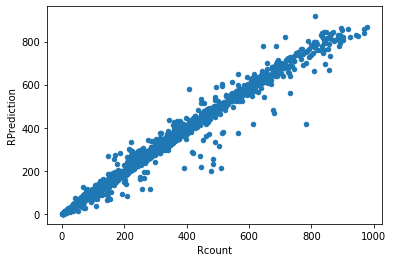

In [165]:
X_test_pred.plot(x='Rcount', y='RPrediction', kind='scatter')

In [166]:
X_test_pred=X_test_pred.reset_index()
X_test_pred

,index,season,holiday,workingday,weather,atemp,humidity,windspeed,Year,Month,...,time,Daylight,count1D,count1W,count1Dpct,count1Wpct,Prediction,count,RPrediction,Rcount
0,8708,Fall,0,0,Clear Skies,34.850,74,16.9979,2012,8,...,582,0,17.0,0.0,0.105263,0.000000,3.092667,2.995732,21.035769,19.0
1,8709,Fall,0,0,Clear Skies,34.850,79,16.9979,2012,8,...,582,0,49.0,0.0,-1.578947,0.000000,3.041484,2.995732,19.936298,19.0
2,8710,Fall,0,0,Clear Skies,35.605,74,19.9995,2012,8,...,582,1,67.0,0.0,0.014706,0.000000,4.508941,4.234107,89.825581,68.0
3,8711,Fall,0,0,Clear Skies,36.365,66,22.0028,2012,8,...,582,1,181.0,0.0,-0.675926,0.000000,4.714908,4.691348,110.598580,108.0
4,8712,Fall,0,0,Clear Skies,38.635,59,23.9994,2012,8,...,582,1,278.0,0.0,-0.213974,0.000000,5.461709,5.438079,234.499450,229.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2173,10881,Winter,0,1,Clear Skies,19.695,50,26.0027,2012,12,...,718,0,353.0,402.0,-0.050595,-0.196429,5.811146,5.820083,333.001599,336.0
2174,10882,Winter,0,1,Clear Skies,17.425,57,15.0013,2012,12,...,718,0,268.0,268.0,-0.112033,-0.112033,5.519607,5.488938,248.536983,241.0
2175,10883,Winter,0,1,Clear Skies,15.910,61,15.0013,2012,12,...,718,0,168.0,202.0,0.000000,-0.202381,5.153747,5.129899,172.078885,168.0
2176,10884,Winter,0,1,Clear Skies,17.425,61,6.0032,2012,12,...,718,0,132.0,122.0,-0.023256,0.054264,4.815527,4.867534,122.411854,129.0


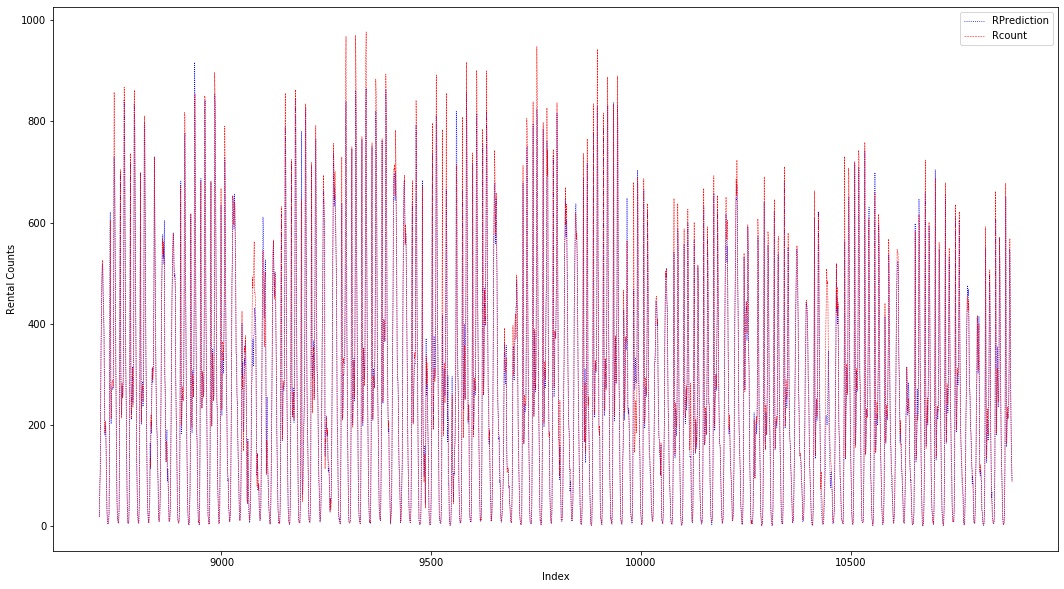

In [167]:
fig, ax = plt.subplots(1, figsize=(18, 10))
ax.plot('index', 'RPrediction', data=X_test_pred, linewidth=0.8, color='b', linestyle=':')
ax.plot('index', 'Rcount', data=X_test_pred , linewidth=0.5, color='r', ls='--')
plt.xlabel('Index')
plt.ylabel('Rental Counts')
plt.legend()
plt.show()

In [168]:
X_test_pred['error']=X_test_pred['Rcount']-X_test_pred['RPrediction']
X_test_pred['error_pc']=X_test_pred['error']/X_test_pred['Rcount']
print(X_test_pred['error_pc'].min(), " ", X_test_pred['error_pc'].max(),X_test_pred['error_pc'].mean() )

-0.9087744303153923   0.7575736736754903 0.029249435179498146


## XGBoost 

In [169]:
import xgboost as xgb
from category_encoders import OrdinalEncoder

In [170]:
mod3=xgb.XGBRegressor()
mod3.get_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'gamma': None,
 'gpu_id': None,
 'importance_type': 'gain',
 'interaction_constraints': None,
 'learning_rate': None,
 'max_delta_step': None,
 'max_depth': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [171]:
pipe2=make_pipeline(OrdinalEncoder(), mod3)

In [172]:
pipe2.steps[1][1].get_params

<bound method XGBModel.get_params of XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             objective='reg:squarederror', random_state=None, reg_alpha=None,
             reg_lambda=None, scale_pos_weight=None, subsample=None,
             tree_method=None, validate_parameters=None, verbosity=None)>

In [173]:
pipe2.steps[1][1].set_params(learning_rate=0.1)

XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=0.1, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             objective='reg:squarederror', random_state=None, reg_alpha=None,
             reg_lambda=None, scale_pos_weight=None, subsample=None,
             tree_method=None, validate_parameters=None, verbosity=None)

In [174]:
X=df.drop(['count', 'datetime', 'Date', 'index'], axis=1)
y = df['count']
X_trn, X_tst, y_trn, y_tst=train_test_split(X,y, test_size=0.20, random_state=65, shuffle=False)
#X_trn, X_val, y_trn, y_val=train_test_split(X_trn,y_trn, test_size=0.20, random_state=65, shuffle=False)

In [175]:
max_depth = [3,5,7]
learning_rate=[.01, .1, .3]
num_trees =[500, 1000]
scores_list=[]
for depth in max_depth:
    for rate in learning_rate:
        for tree in num_trees:
            print(f"testing model with: depth: {depth}, rate: {rate}, trees: {tree}")
            pipe2.steps[1][1].set_params(max_depth=depth, learning_rate=rate, n_estimators=tree)
            scores = cross_val_score(estimator=pipe2, X=X_trn, y =y_trn, cv=tscv, scoring=rmsle_scorer)
            scores_list.append((-scores.mean(),scores.std(), depth, rate, tree))

testing model with: depth: 3, rate: 0.01, trees: 500
testing model with: depth: 3, rate: 0.01, trees: 1000
testing model with: depth: 3, rate: 0.1, trees: 500
testing model with: depth: 3, rate: 0.1, trees: 1000
testing model with: depth: 3, rate: 0.3, trees: 500
testing model with: depth: 3, rate: 0.3, trees: 1000
testing model with: depth: 5, rate: 0.01, trees: 500
testing model with: depth: 5, rate: 0.01, trees: 1000
testing model with: depth: 5, rate: 0.1, trees: 500
testing model with: depth: 5, rate: 0.1, trees: 1000
testing model with: depth: 5, rate: 0.3, trees: 500
testing model with: depth: 5, rate: 0.3, trees: 1000
testing model with: depth: 7, rate: 0.01, trees: 500
testing model with: depth: 7, rate: 0.01, trees: 1000
testing model with: depth: 7, rate: 0.1, trees: 500
testing model with: depth: 7, rate: 0.1, trees: 1000
testing model with: depth: 7, rate: 0.3, trees: 500
testing model with: depth: 7, rate: 0.3, trees: 1000


In [176]:
scores_list.sort(key=lambda x: x[0])
scores_list

[(0.2788189004600415, 0.07165551668413336, 7, 0.01, 500),
 (0.28190339660663344, 0.04164191622904236, 5, 0.01, 1000),
 (0.31066983732343106, 0.029596237296478128, 5, 0.01, 500),
 (0.3136748909519639, 0.14624375119524538, 7, 0.01, 1000),
 (0.33082747252508443, 0.1290075877591602, 7, 0.3, 500),
 (0.3310982619608561, 0.12940602399235984, 7, 0.3, 1000),
 (0.353751616491979, 0.2204047059678595, 7, 0.1, 500),
 (0.3542025722294485, 0.2202919940058537, 7, 0.1, 1000),
 (0.3864465254376925, 0.21077277008836595, 5, 0.1, 500),
 (0.39521971275457574, 0.07651349526637924, 5, 0.3, 500),
 (0.3966514139350196, 0.20126097990562672, 5, 0.1, 1000),
 (0.4021144606335894, 0.07981962438294, 5, 0.3, 1000),
 (0.4092753147400052, 0.03015965595056034, 3, 0.01, 1000),
 (0.4671837875361432, 0.044180187951764635, 3, 0.01, 500),
 (0.5421079511862132, 0.33880456011038373, 3, 0.1, 500),
 (0.5639440079122968, 0.35983182149294646, 3, 0.1, 1000),
 (0.568996440567971, 0.3367577088286542, 3, 0.3, 500),
 (0.6086199608843941

In [177]:
pipe2.steps[1][1].set_params(max_depth=7, n_estimators=500,learning_rate=0.01 )

XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=0.01, max_delta_step=None, max_depth=7,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=None, num_parallel_tree=None,
             objective='reg:squarederror', random_state=None, reg_alpha=None,
             reg_lambda=None, scale_pos_weight=None, subsample=None,
             tree_method=None, validate_parameters=None, verbosity=None)

In [178]:
#Score on test data set
pipe2.fit(X_trn, y_trn)
pipe2.score(X_tst, y_tst) 

0.9742278985144319

In [179]:
X_pred=X_tst.copy()
X_pred['Prediction']=pipe2.predict(X_tst)

X_pred = X_pred.merge(y_tst, left_index=True, right_index=True)
X_pred['Prediction']=(X_pred['Prediction'])
X_pred['count']=(X_pred['count'])

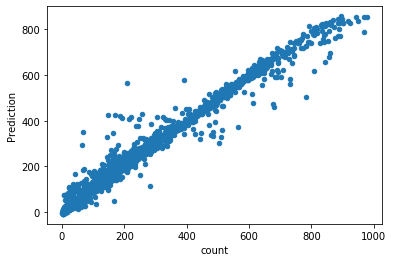

In [180]:
X_pred.plot(x='count', y='Prediction', kind='scatter')

In [181]:
X_pred['error']=X_pred['count']-X_pred['Prediction']
X_pred['error_pc']=X_pred['error']/X_pred['count']
print(X_pred['error_pc'].min(), " ",X_pred['error_pc'].max())

-11.666702270507812   5.324510097503662


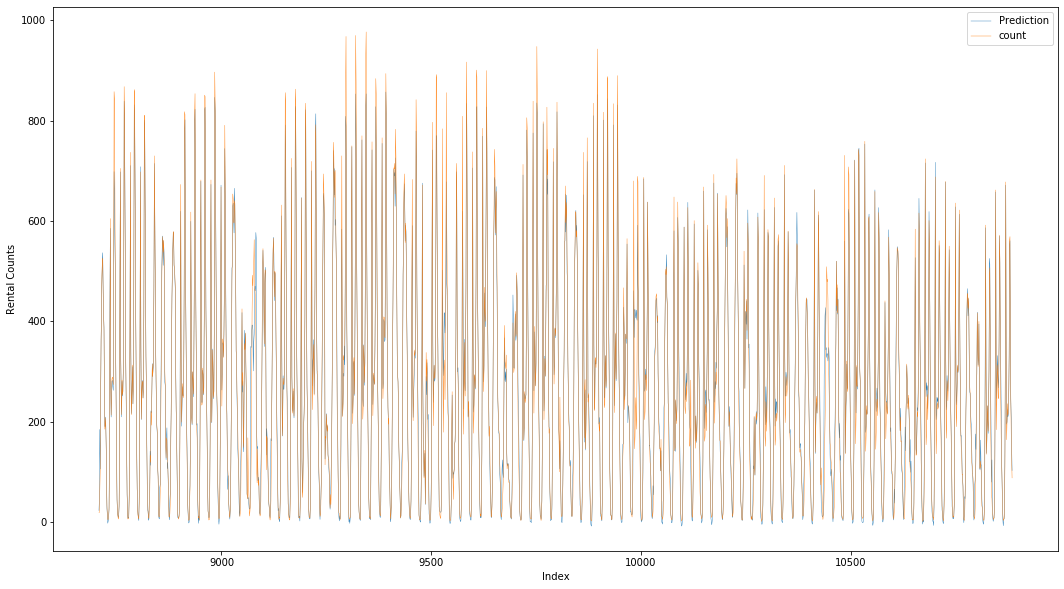

In [182]:
X_pred=X_pred.reset_index()
fig, ax = plt.subplots(1, figsize=(18, 10))
ax.plot('index', 'Prediction', data=X_pred, linewidth=0.4)
ax.plot('index', 'count', data=X_pred , linewidth=0.4)
plt.xlabel('Index')
plt.ylabel('Rental Counts')
plt.legend()
plt.show()

In [183]:
y_pred_xgb=pipe2.predict(X_tst)


In [184]:
y_pred_xgb.min()

-8.081966

In [185]:
y_pred_xgb=y_pred_xgb.clip(min=0) #clip negative values
y_pred_xgb.max()

857.26434

In [186]:
rmsle_xgb=round(np.sqrt(mean_squared_log_error( y_tst, y_pred_xgb )),3)

In [187]:
pd.options.display.float_format = "{:,.3f}".format

In [188]:
lst=[rmsle_gbr, rmsle_ln, rmsle_xgb]

rmsle_df=pd.DataFrame(lst, index=['GBR', 'GBRLog', 'XGBoost'])
rmsle_df.columns= [' RMSLE ']
rmsle_df

,RMSLE
GBR,0.581
GBRLog,0.143
XGBoost,0.442


**Comments**: \
    Adding a column with daly time shift gave much better scores, \
    Use ln(counts) to improve accuracy of the predicive model, \
    Next: try XGBoost with ln(count)
    

**References**:
    https://medium.com/analytics-vidhya/root-mean-square-log-error-rmse-vs-rmlse-935c6cc1802a,    
    https://www.kaggle.com/hmavrodiev/bike-sharing-prediction-rf-xgboost
    
        